In [41]:
import cv2 as cv
from glob import glob
import json
from datetime import datetime

In [23]:
files1 = glob('../../data/nuScenes/sweeps/CAM_BACK/n015*')
files2 = glob('../../data/nuScenes/samples/CAM_BACK/n015*')
files = files1+files2
files.sort(key=lambda x: x.split('/')[-1])

In [64]:
files[0]

'../../data/nuScenes/samples/CAM_BACK/n015-2018-07-11-11-54-16+0800__CAM_BACK__1531281439787525.jpg'

In [77]:
files[7]

'../../data/nuScenes/sweeps/CAM_BACK/n015-2018-07-11-11-54-16+0800__CAM_BACK__1531281440387525.jpg'

In [69]:
files[2399]

'../../data/nuScenes/sweeps/CAM_BACK/n015-2018-07-11-11-54-16+0800__CAM_BACK__1531281974437525.jpg'

In [62]:
data = dict()
# curr = datetime.strptime(files[0].split('/')[-1][5:24], '%Y-%m-%d-%H-%M-%S')
for f in files:
    datetime_str = f.split('/')[-1][5:24]
#     dt = datetime.strptime(datetime_str, '%Y-%m-%d-%H-%M-%S')
#     diff = (dt-curr).total_seconds()
    if not datetime_str in data.keys():
        data[datetime_str]=[]
    data[datetime_str].append(f)
    
img = cv.imread(files[0])
frame_size = (img.shape[1], img.shape[0])
for key in data.keys():
    print(key)
    fourcc = cv.VideoWriter_fourcc(*'mp4v')
    out = cv.VideoWriter('./n015/n015_%s.mp4'%key.replace('-', '_'), fourcc, 12, frame_size)
    for f in data[key]:
        img = cv2.imread(f)
        out.write(img)
    cv.destroyAllWindows()
    out.release()

2018-07-11-11-54-16
2018-07-16-11-49-16
2018-07-18-11-07-57
2018-07-18-11-18-34
2018-07-18-11-41-49
2018-07-18-11-50-34


KeyboardInterrupt: 

In [54]:
data.keys()

dict_keys(['2018-07-11-11-54-16', '2018-07-16-11-49-16', '2018-07-18-11-07-57', '2018-07-18-11-18-34', '2018-07-18-11-41-49', '2018-07-18-11-50-34', '2018-07-24-10-42-41', '2018-07-24-11-03-52', '2018-07-24-11-13-19', '2018-07-24-11-22-45', '2018-07-27-11-24-31', '2018-07-27-11-36-48', '2018-08-01-15-10-21', '2018-08-01-16-32-59', '2018-08-01-16-41-59', '2018-08-01-17-04-15', '2018-08-01-17-13-57', '2018-08-02-17-16-37', '2018-08-02-17-28-51', '2018-08-03-15-00-36', '2018-08-03-15-21-40', '2018-08-03-15-31-50', '2018-09-25-11-10-38', '2018-09-25-13-17-43', '2018-09-26-11-17-24', '2018-09-27-15-33-17', '2018-10-02-10-50-40', '2018-10-02-10-56-37', '2018-10-08-15-36-50', '2018-10-08-15-44-23', '2018-10-08-15-52-24', '2018-10-08-16-03-24', '2018-11-14-18-57-54', '2018-11-14-19-09-14', '2018-11-21-19-11-29', '2018-11-21-19-21-35', '2018-11-21-19-38-26', '2018-11-21-19-58-31'])

In [29]:
CLASSES = ('car', 'truck', 'trailer', 'bus', 'construction_vehicle',
           'bicycle', 'motorcycle', 'pedestrian', 'traffic_cone',
           'barrier')
COLORS = ((256,0,0), (0,256,0), (0,0,256), (256,256,0), (0,256,256), (256,0,256), (25,100,100), (0,0,0),  (128,128,128),
          (128, 128, 0))
len(CLASSES)

10

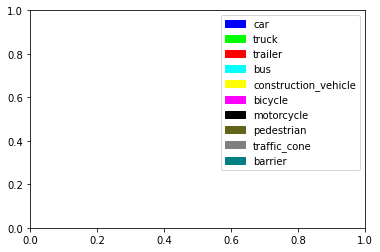

In [31]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

def rgb2bgr(color):
    return (color[2], color[1], color[0])
# fig, ax = plt.subplots()
patches = []
for i in range(len(COLORS)):
    patches.append(mpatches.Patch(color=np.asarray(rgb2bgr(COLORS[i]))/256, label=CLASSES[i]))
plt.legend(handles=patches)
plt.show()